In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시

In [13]:
test_df = pd.read_csv("C:/Users/jinje/바탕 화면/내일배움캠프/심화 프로젝트/new_test.csv", index_col=0)
train_df = pd.read_csv("C:/Users/jinje/바탕 화면/내일배움캠프/심화 프로젝트/minmax_df.csv", index_col=0)

## 변수 소거법

### 1. Gradient Boosting

#### MINMAX SCALER

In [15]:
from sklearn.model_selection import train_test_split

y = train_df["대출등급"]
X = train_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.887933,0.888036
test,0.859546,0.859088


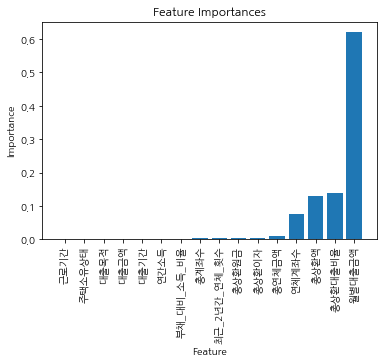

In [29]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_df.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [28]:
sorted(feature_importances)

[1.7593362945684367e-05,
 0.00019373570644742167,
 0.0003942043690765847,
 0.0005113401648716826,
 0.0015182443944140394,
 0.0017325534367985782,
 0.0018628719591786617,
 0.0038020926788457595,
 0.0038137630685563017,
 0.004364878882828651,
 0.0047450530667329585,
 0.011373168728512163,
 0.07476121500063955,
 0.13090912807489605,
 0.13980081878416445,
 0.6201993383210914]

In [32]:
train_df

,ID,근로기간,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,6,2,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,1,0,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,5,0,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,8,0,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,11,2,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,1,0,3,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,1,0,10,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,0,0,3,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,5,0,1,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [157]:
train_df.groupby("대출등급").count()

,ID,근로기간,주택소유상태,대출목적,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
대출등급,,,,,,,,,,,,,,,,,
A,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772,16772
B,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817,28817
C,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622,27622
D,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354,13354
E,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354,7354
F,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954,1954
G,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420


In [33]:
train_drop1 = train_df.drop("근로기간", axis = 1)
train_drop1

,ID,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,2,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,0,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,0,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,0,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,2,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,0,3,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,0,10,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,0,3,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,0,1,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [34]:
from sklearn.model_selection import train_test_split

y = train_drop1["대출등급"]
X = train_drop1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.888854,0.888950
test,0.860325,0.860002


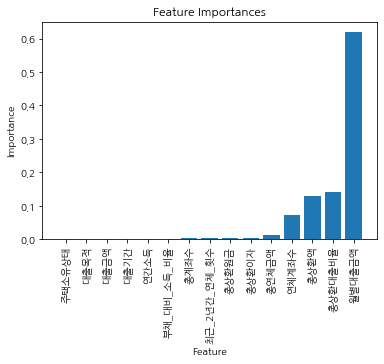

In [36]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [37]:
train_drop2 = train_drop1.drop("주택소유상태", axis = 1)
train_drop2

,ID,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,3,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,10,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,3,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,1,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [38]:
from sklearn.model_selection import train_test_split

y = train_drop2["대출등급"]
X = train_drop2.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.887985,0.888081
test,0.858715,0.858308


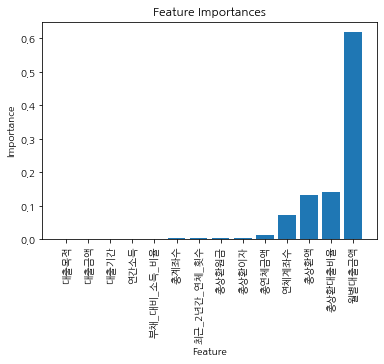

In [40]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop2.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [41]:
train_drop3 = train_drop2.drop("대출목적", axis = 1)
train_drop3

,ID,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [42]:
from sklearn.model_selection import train_test_split

y = train_drop3["대출등급"]
X = train_drop3.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.888140,0.888231
test,0.860948,0.860593


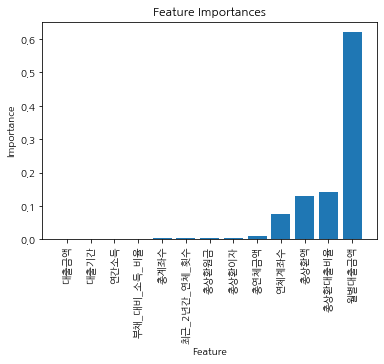

In [44]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop3.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [45]:
train_drop4 = train_drop3.drop("대출금액", axis = 1)
train_drop4

,ID,대출등급,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [46]:
from sklearn.model_selection import train_test_split

y = train_drop4["대출등급"]
X = train_drop4.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.887426,0.887507
test,0.859390,0.859045


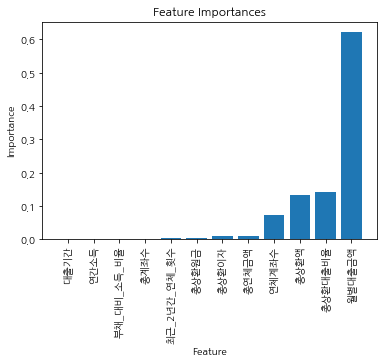

In [48]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop4.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [49]:
train_drop5 = train_drop4.drop("대출기간", axis = 1)
train_drop5

,ID,대출등급,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [50]:
from sklearn.model_selection import train_test_split

y = train_drop5["대출등급"]
X = train_drop5.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.883402,0.883518
test,0.856119,0.855674


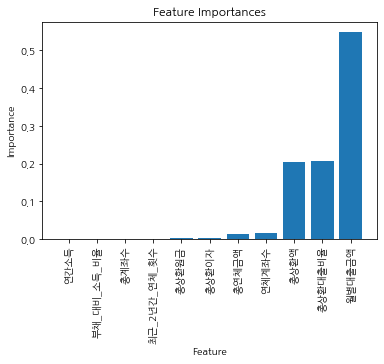

In [52]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop5.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [56]:
train_drop6 = train_drop5.drop("연간소득", axis = 1)
train_drop6

,ID,대출등급,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [57]:
from sklearn.model_selection import train_test_split

y = train_drop6["대출등급"]
X = train_drop6.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.884103,0.884234
test,0.857573,0.857157


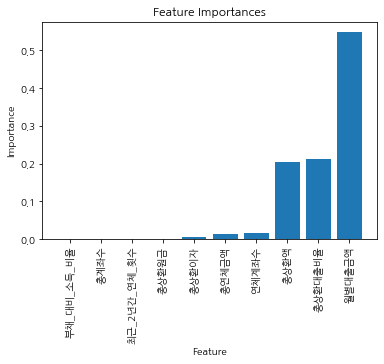

In [59]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop6.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [60]:
train_drop7 = train_drop6.drop("부채_대비_소득_비율", axis = 1)
train_drop7

,ID,대출등급,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [61]:
from sklearn.model_selection import train_test_split

y = train_drop7["대출등급"]
X = train_drop7.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.881364,0.881468
test,0.857521,0.857183


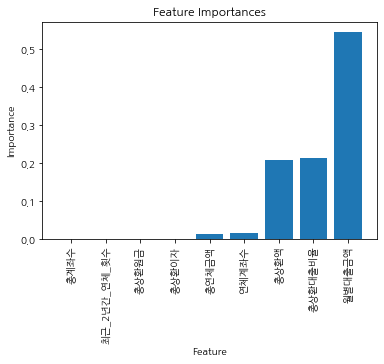

In [63]:
# Get feature importances
feature_importances = GB_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop7.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### 2. XGBoost

#### MINMAX SCALER

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_df["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_df.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [107]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.798712,0.797896
test,0.788930,0.787606


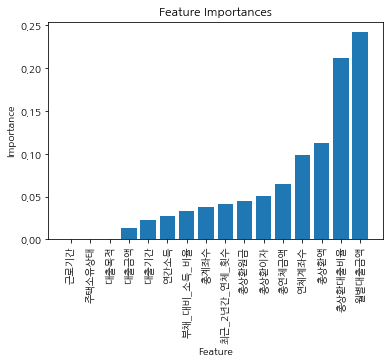

In [108]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_df.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [109]:
train_drop1_1 = train_df.drop("근로기간", axis = 1)
train_drop1_1

,ID,주택소유상태,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,2,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,0,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,0,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,0,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,2,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,0,3,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,0,10,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,0,3,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,0,1,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop1_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop1_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [111]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.798712,0.797896
test,0.788930,0.787606


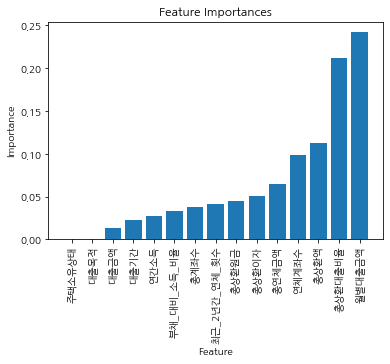

In [112]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop1_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [82]:
train_drop2_1 = train_drop1_1.drop("주택소유상태", axis = 1)
train_drop2_1

,ID,대출목적,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,1,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,10,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,1,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,1,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,8,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,3,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,10,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,3,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,1,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop2_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop2_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [84]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.797284,0.796435
test,0.787528,0.786148


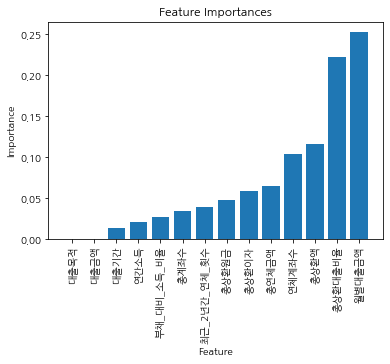

In [85]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop2_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [86]:
train_drop3_1 = train_drop2_1.drop("대출목적", axis = 1)
train_drop3_1

,ID,대출등급,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.658671,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.698921,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.647640,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.698921,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.761684,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.698921,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.893880,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.698921,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.721434,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop3_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop3_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [88]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.796324,0.795660
test,0.787320,0.786228


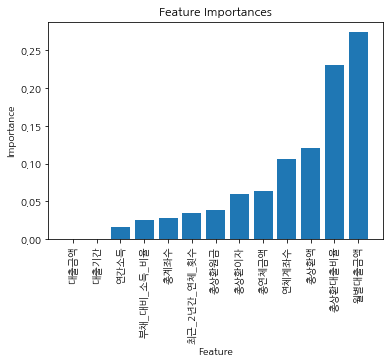

In [89]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop3_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [90]:
train_drop4_1 = train_drop3_1.drop("대출금액", axis = 1)
train_drop4_1

,ID,대출등급,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.0,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,1.0,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.0,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.0,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,1.0,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.0,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,1.0,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.0,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.0,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop4_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop4_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [92]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.797868,0.797191
test,0.789034,0.787839


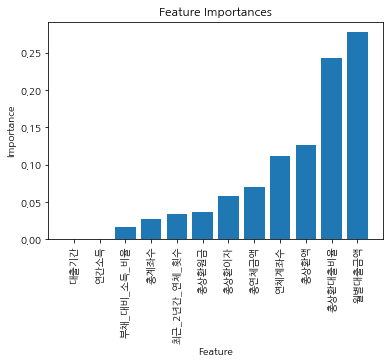

In [93]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop4_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [94]:
train_drop5_1 = train_drop4_1.drop("대출기간", axis = 1)
train_drop5_1

,ID,대출등급,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.783116,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.808957,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.795568,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.809352,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.782957,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.829450,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.809352,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.789788,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.779565,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop5_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop5_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [96]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.797414,0.796696
test,0.789864,0.788698


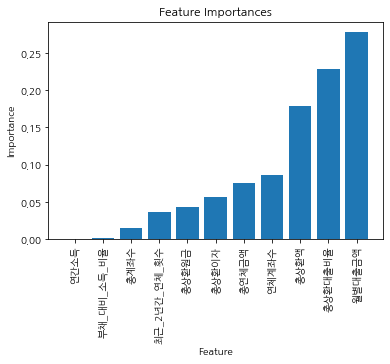

In [97]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop5_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [98]:
train_drop6_1 = train_drop5_1.drop("연간소득", axis = 1)
train_drop6_1

,ID,대출등급,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.324713,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.341979,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.245568,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.301639,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.355360,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.253525,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.197395,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.271945,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.315613,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop6_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop6_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [100]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.797051,0.796390
test,0.789916,0.788868


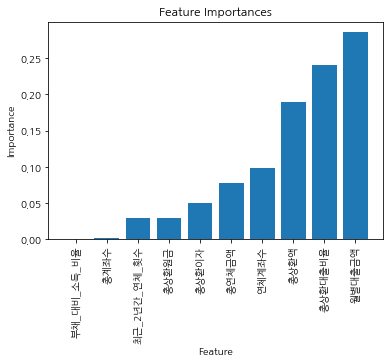

In [101]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop6_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [102]:
train_drop7_1 = train_drop6_1.drop("부채_대비_소득_비율", axis = 1)
train_drop7_1

,ID,대출등급,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,C,0.329845,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669
1,TRAIN_00001,B,0.420151,0.000000,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240
2,TRAIN_00002,A,0.311543,0.000000,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638
3,TRAIN_00003,C,0.329845,0.000000,0.723224,0.767885,0.0,0.0,0.744785,0.045690,0.698919
4,TRAIN_00004,B,0.393123,0.000000,0.703018,0.766117,0.0,0.0,0.731233,0.028984,0.618003
...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96289,C,0.543598,0.000000,0.785646,0.842988,0.0,0.0,0.808519,0.135453,0.698919
96289,TRAIN_96290,E,0.467524,0.000000,0.756443,0.878515,0.0,0.0,0.807424,0.068079,0.750200
96290,TRAIN_96291,A,0.432757,0.000000,0.809799,0.797126,0.0,0.0,0.817931,0.158464,0.698919
96291,TRAIN_96292,D,0.420151,0.319923,0.805396,0.875670,0.0,0.0,0.831513,0.183953,0.721432


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = train_drop7_1["대출등급"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train_drop7_1.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [104]:
import xgboost as xgb

xgb_minmax = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost classifier
xgb_minmax.fit(X_train, y_train)

y_pred_train = xgb_minmax.predict(X_train)
y_pred_test = xgb_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.794532,0.793855
test,0.785918,0.784718


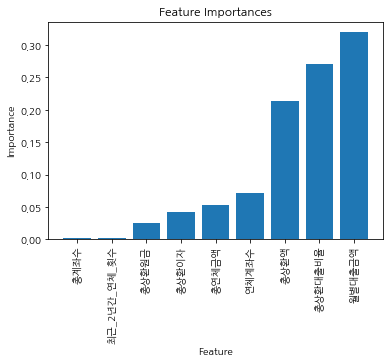

In [105]:
# Get feature importances
feature_importances = xgb_minmax.feature_importances_

# Plot feature importances
plt.bar(range(len(feature_importances)), sorted(feature_importances))
plt.xticks(range(len(feature_importances)),train_drop7_1.columns.drop(["ID","대출등급"]), rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Gradient Boosting - 3개  
XGBoost - 4개  
제거하는 것으로 결정!

## 모델링, 하이퍼파라미터 조정

### 1. Gradient Boosting

#### test = 0.2

In [116]:
from sklearn.model_selection import train_test_split

y = train_drop3["대출등급"]
X = train_drop3.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.888140,0.888231
test,0.860948,0.860593


n_estimators=100, learning_rate=0.1, random_state=42 --> max_depth 조정

max_depth = 3

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.828595,0.828211
test,0.817488,0.816566


max_depth = 4

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.859413,0.859398
test,0.840386,0.839810


max_depth = 5

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.888140,0.888231
test,0.860948,0.860593


max_depth = 6

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.914557,0.914626
test,0.872268,0.871899


max_depth = 7

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.939455,0.939513
test,0.881562,0.881238


n_estimators=100, learning_rate=0.05

max_depth = 3

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.797142,0.796177
test,0.787580,0.786026


max_depth = 4

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.830997,0.830431
test,0.819876,0.818659


max_depth = 5

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.858738,0.858688
test,0.838932,0.838429


max_depth = 6

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.884895,0.884953
test,0.856794,0.856365


max_depth = 7

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=7, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.910637,0.910706
test,0.868996,0.868645


n_estimators=100, learning_rate=0.2

max_depth = 3

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.855908,0.855877
test,0.841788,0.841153


max_depth = 4

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.888348,0.888302
test,0.858819,0.858350


max_depth = 5

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.915336,0.915397
test,0.873929,0.873637


max_depth = 6

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=6, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.948854,0.948911
test,0.887170,0.886911


max_depth = 7

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=7, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.968144,0.968180
test,0.888104,0.887816


n_estimators=200, learning_rate=0.05

max_depth = 6

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.913116,0.913198
test,0.872839,0.872435


max_depth = 7

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.937911,0.937977
test,0.882081,0.881711


max_depth = 8

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.960498,0.960538
test,0.891947,0.891500


n_estimators=200, learning_rate=0.1

max_depth = 6

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.945050,0.945120
test,0.887481,0.887115


max_depth = 7

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.967936,0.967976
test,0.895062,0.894753


max_depth = 8

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=8, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.986629,0.986640
test,0.899060,0.898636


n_estimators=200, learning_rate=0.2

max_depth = 6

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=6, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.975868,0.975895
test,0.896516,0.896205


max_depth = 7

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=7, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.941364,0.943873
test,0.860585,0.862679


max_depth = 8

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=8, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.997793,0.997793
test,0.904253,0.903839


#### 가장 성능이 좋은 마지막 모델을 대상으로 test = 0.25 변경

In [147]:
from sklearn.model_selection import train_test_split

y = train_drop3["대출등급"]
X = train_drop3.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=8, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.998588,0.998588
test,0.902675,0.902251


#### test = 0.3 도 확인

In [149]:
from sklearn.model_selection import train_test_split

y = train_drop3["대출등급"]
X = train_drop3.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 42)

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=8, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.998947,0.998947
test,0.902070,0.901696


역시 test = 0.2 인 모델이 성능이 가장 좋았음

이 모델을 기반으로 성능 높여보자

In [151]:
from sklearn.model_selection import train_test_split

y = train_drop3["대출등급"]
X = train_drop3.copy()
X = X.drop("대출등급", axis = 1)
X = X.drop("ID", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

max_depth = 9

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=9, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.999961,0.999961
test,0.905810,0.905419


max_depth = 10

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=10, random_state=42)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,1.00000,1.000000
test,0.90633,0.905982


subsample 조정

subsample = 0.7

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=10, random_state=42, subsample = 0.7)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.249734,0.260327
test,0.226699,0.235880


subsample = 0.5

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=10, random_state=42, subsample = 0.5)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.468027,0.531002
test,0.425723,0.484341


subsample = 0.3

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Gradient Boosting classifier
GB_minmax = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=10, random_state=42, subsample = 0.3)

# Train the Gradient Boosting classifier
GB_minmax.fit(X_train, y_train)

y_pred_train = GB_minmax.predict(X_train)
y_pred_test = GB_minmax.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_f1score = f1_score(y_train, y_pred_train, average = "weighted")
test_f1score = f1_score(y_test, y_pred_test, average = "weighted")

result = pd.DataFrame({"accuracy" : [train_accuracy, test_accuracy],
                      "f1score" : [train_f1score, test_f1score]},
                     index = ["train","test"])

display(result)

,accuracy,f1score
train,0.084950,0.087617
test,0.083597,0.086868
